#Part 1: Cek GPU

In [1]:
# Cek GPU di environment lo
import torch

device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
print(f"Device yang digunakan: {device}")

# Info tambahan GPU (kalau pakai CUDA)
if device.type == 'cuda':
    print(torch.cuda.get_device_name(0))
    print(f"Memory GPU tersedia: {round(torch.cuda.get_device_properties(0).total_memory / 1024**3, 2)} GB")


Device yang digunakan: cuda
Tesla T4
Memory GPU tersedia: 14.74 GB


#Part 2: Install Library yang Dibutuhkan

In [2]:
# Install Library Utama
!pip install torch torchvision torchaudio --upgrade
!pip install albumentations==1.3.0
!pip install segmentation-models-pytorch==0.3.3
!pip install opencv-python
!pip install matplotlib
!pip install tqdm
!pip install seaborn
!pip install scikit-learn
!pip install timm


   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 865.2/865.2 MB 1.2 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 393.1/393.1 MB 3.8 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 8.9/8.9 MB 97.0 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 23.7/23.7 MB 71.7 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 897.7/897.7 kB 45.8 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 571.0/571.0 MB 2.2 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 200.2/200.2 MB 5.4 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.1/1.1 MB 59.3 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 56.3/56.3 MB 14.9 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 158.2/158.2 MB 6.6 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 216.6/216.6 MB 5.5 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 156.8/156.8 MB 6.8 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 201

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 123.5/123.5 kB 6.8 MB/s eta 0:00:00
  Attempting uninstall: albumentations
    Found existing installation: albumentations 2.0.6
    Uninstalling albumentations-2.0.6:
      Successfully uninstalled albumentations-2.0.6
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 58.8/58.8 kB 3.3 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
  Preparing metadata (setup.py) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 68.5/68.5 kB 7.1 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 106.7/106.7 kB 10.8 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.2/2.2 MB 49.7 MB/s eta 0:00:00
  Created wheel for efficientnet-pytorch: filename=efficientnet_pytorch-0.7.1-py3-none-any.whl size=16426 sha256=6c4c8ac6905a99d63c3178b3a81ded9fa75867d2ec066ebd550db95b38b08c2c
  Stored in directory: /root/.cache/pip/wheels/8b/6f/9b/231a832f811ab6ebb1b32455b177ffc6b8b1cd8de19de70c09
  Created wheel for pretrainedmodels: filename=pret

#Part 3: Download Dataset CWFID

In [2]:
import os
print(os.listdir())
# Download the dataset
!wget https://github.com/cwfid/dataset/archive/v1.0.tar.gz
!tar -zxf v1.0.tar.gz
pardir = "dataset-1.0"

['.config', 'sample_data']
--2025-05-07 16:11:03--  https://github.com/cwfid/dataset/archive/v1.0.tar.gz
Resolving github.com (github.com)... 140.82.116.3
Connecting to github.com (github.com)|140.82.116.3|:443... connected.
HTTP request sent, awaiting response... 302 Found
Location: https://codeload.github.com/cwfid/dataset/tar.gz/refs/tags/v1.0 [following]
--2025-05-07 16:11:03--  https://codeload.github.com/cwfid/dataset/tar.gz/refs/tags/v1.0
Resolving codeload.github.com (codeload.github.com)... 140.82.116.10
Connecting to codeload.github.com (codeload.github.com)|140.82.116.10|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: unspecified [application/x-gzip]
Saving to: ‘v1.0.tar.gz’

v1.0.tar.gz             [              <=>   ]  86.12M  31.1MB/s    in 2.8s    

2025-05-07 16:11:06 (31.1 MB/s) - ‘v1.0.tar.gz’ saved [90303402]



In [3]:
import os

pardir = "dataset-1.0"

# List gambar dan mask
print("Images Folder:", os.listdir(os.path.join(pardir, "images"))[:5])
print("Masks Folder:", os.listdir(os.path.join(pardir, "annotations"))[:5])

Images Folder: ['039_image.png', '005_image.png', '057_image.png', '015_image.png', '022_image.png']
Masks Folder: ['015_annotation.yaml', '039_annotation.png', '051_annotation.yaml', '030_annotation.png', '027_annotation.png']


In [4]:
from PIL import Image
import numpy as np

mask_path = '/content/dataset-1.0/annotations/001_annotation.png'

mask = Image.open(mask_path)
mask_np = np.array(mask)

print("Mask shape:", mask_np.shape)
print("Unique pixel values (classes):", np.unique(mask_np))

Mask shape: (966, 1296, 3)
Unique pixel values (classes): [  0 255]


In [5]:
def convert_rgb_mask_to_label(mask_rgb):
    """
    Convert RGB mask (H, W, 3) → label mask (H, W)
    Black (0,0,0) → 0 (background)
    Green (0,255,0) → 1 (crop)
    Red (255,0,0) → 2 (weed)
    """
    label_mask = np.zeros((mask_rgb.shape[0], mask_rgb.shape[1]), dtype=np.uint8)

    background = np.all(mask_rgb == [0, 0, 0], axis=-1)
    crop = np.all(mask_rgb == [0, 255, 0], axis=-1)
    weed = np.all(mask_rgb == [255, 0, 0], axis=-1)

    label_mask[background] = 0
    label_mask[crop] = 1
    label_mask[weed] = 2

    return label_mask

# Part 5: Patching Dataset (Dataloader)

In [6]:
import os
from PIL import Image
from torch.utils.data import Dataset, DataLoader
import torchvision.transforms as T
import torch

In [7]:
import os
from PIL import Image
from torch.utils.data import Dataset
import numpy as np

class CWFIDPatchDataset(Dataset):
    def __init__(self, image_dir, mask_dir, patch_size=512, stride=256, transform=None):
        self.image_dir = image_dir
        self.mask_dir = mask_dir

        # ✅ Filter hanya file gambar yang diinginkan
        valid_ext = ['.png', '.jpg', '.jpeg']

        self.image_paths = sorted([
            os.path.join(image_dir, f)
            for f in os.listdir(image_dir)
            if os.path.splitext(f)[1].lower() in valid_ext
        ])

        self.mask_paths = sorted([
            os.path.join(mask_dir, f)
            for f in os.listdir(mask_dir)
            if os.path.splitext(f)[1].lower() in valid_ext
        ])

        self.patch_size = patch_size
        self.stride = stride
        self.transform = transform

        self.patches = self.create_patch_index()

    def create_patch_index(self):
        patch_list = []
        for idx, img_path in enumerate(self.image_paths):
            img = Image.open(img_path)
            w, h = img.size
            for y in range(0, h - self.patch_size + 1, self.stride):
                for x in range(0, w - self.patch_size + 1, self.stride):
                    patch_list.append((idx, x, y))
        return patch_list

    def __len__(self):
        return len(self.patches)

    def __getitem__(self, index):
        idx, x, y = self.patches[index]

        img = Image.open(self.image_paths[idx]).convert("RGB")
        mask = Image.open(self.mask_paths[idx]).convert("RGB")  # convert RGB biar aman ke label mask

        img_patch = img.crop((x, y, x + self.patch_size, y + self.patch_size))
        mask_patch = mask.crop((x, y, x + self.patch_size, y + self.patch_size))

        # Convert mask ke label di sini (jika perlu), atau lakukan di transform
        mask_patch = np.array(mask_patch)
        mask_patch = convert_rgb_mask_to_label(mask_patch)

        if self.transform:
            augmented = self.transform(image=np.array(img_patch), mask=mask_patch)
            img_patch = augmented['image']
            mask_patch = augmented['mask']

        return img_patch, torch.as_tensor(mask_patch, dtype=torch.long)


In [8]:
import albumentations as A
from albumentations.pytorch import ToTensorV2
import numpy as np

train_transform = A.Compose([
    A.HorizontalFlip(p=0.5),
    A.RandomBrightnessContrast(p=0.2),
    A.RandomCrop(512, 512, p=1.0),
    A.Normalize(mean=(0.5, 0.5, 0.5), std=(0.5, 0.5, 0.5)),
    ToTensorV2(transpose_mask=True)
    ])

#Load Dataset

In [9]:
def visualize_dataset_sample(dataset, index=0, class_colors=None):
    # Ambil sample dari dataset
    img_patch, mask_patch = dataset[index]

    # Convert Tensor ke numpy array
    img_np = img_patch.permute(1, 2, 0).cpu().numpy()  # (H, W, C)
    img_np = (img_np * 0.5 + 0.5)  # Unnormalize
    img_np = np.clip(img_np, 0, 1)

    # Convert mask ke numpy array
    mask_np = mask_patch.cpu().numpy()

    # FIX: Mask RGB → Label mask
    if mask_np.ndim == 3 and mask_np.shape[2] == 3:
        print("Converting RGB mask to label mask...")
        mask_np = convert_rgb_mask_to_label(mask_np)

    # Buat canvas warna mask
    color_mask = np.zeros((mask_np.shape[0], mask_np.shape[1], 3), dtype=np.uint8)

    if class_colors is None:
        class_colors = {
            0: [0, 0, 0],        # Background → Black
            1: [0, 255, 0],      # Crop → Green
            2: [255, 0, 0]       # Weed → Red
        }

    for cls, color in class_colors.items():
        mask_idx = mask_np == cls
        color_mask[mask_idx] = color

    # Overlay mask di atas gambar
    def overlay_mask_on_image(image, mask, alpha=0.4):
        return np.clip((1 - alpha) * image + alpha * (mask / 255.0), 0, 1)

    overlay = overlay_mask_on_image(img_np, color_mask)

    # Plot semua hasil
    plt.figure(figsize=(24, 6))

    plt.subplot(1, 4, 1)
    plt.imshow(img_np)
    plt.title(f'Patch Image #{index}')
    plt.axis('off')

    plt.subplot(1, 4, 2)
    plt.imshow(mask_np, cmap='gray')
    plt.title(f'Label Mask #{index}')
    plt.axis('off')

    plt.subplot(1, 4, 3)
    plt.imshow(color_mask)
    plt.title(f'Colored Mask #{index}')
    plt.axis('off')

    plt.subplot(1, 4, 4)
    plt.imshow(overlay)
    plt.title(f'Overlay Patch + Mask #{index}')
    plt.axis('off')

    plt.show()


In [10]:
# Sesuaikan path folder
image_dir = '/content/dataset-1.0/images'
mask_dir = '/content/dataset-1.0/annotations'

In [11]:
# Buat dataset patch on-the-fly
dataset = CWFIDPatchDataset(
    image_dir=image_dir,
    mask_dir=mask_dir,
    patch_size=512,
    stride=256,
    transform=train_transform  # augmentasi dasar
)

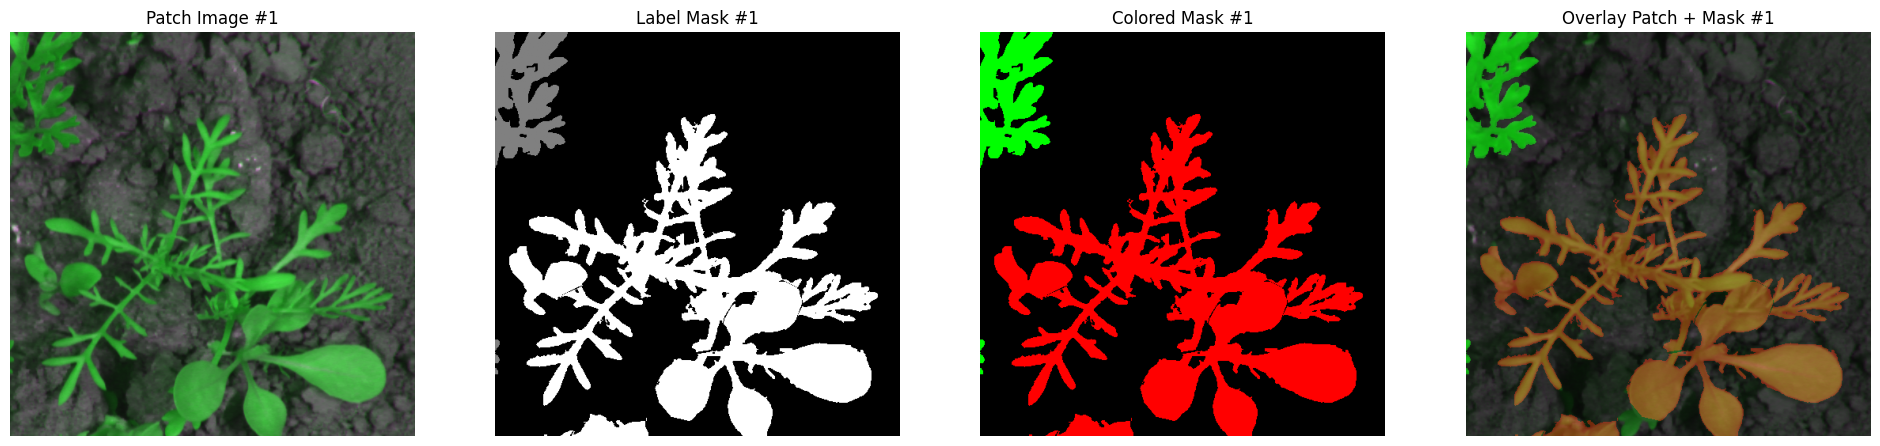

In [12]:
# Dari dataset patch loader (on-the-fly)
import matplotlib.pyplot as plt
visualize_dataset_sample(dataset, index=1)


#Dataset Split

In [13]:
from torch.utils.data import Subset
import numpy as np

import numpy as np
from torch.utils.data import Subset

def split_dataset(dataset, train_ratio=0.7, val_ratio=0.2, test_ratio=0.1, shuffle=True):
    # FIX: Handle floating point precision!
    assert np.isclose(train_ratio + val_ratio + test_ratio, 1.0), "Total split ratio must be 1.0"

    dataset_size = len(dataset)
    indices = list(range(dataset_size))

    if shuffle:
        np.random.shuffle(indices)

    train_end = int(train_ratio * dataset_size)
    val_end = train_end + int(val_ratio * dataset_size)

    train_indices = indices[:train_end]
    val_indices = indices[train_end:val_end]
    test_indices = indices[val_end:]

    train_dataset = Subset(dataset, train_indices)
    val_dataset = Subset(dataset, val_indices)
    test_dataset = Subset(dataset, test_indices)

    print(f"Total Patches: {dataset_size}")
    print(f"Train Set  : {len(train_dataset)} patches ({train_ratio*100}%)")
    print(f"Valid Set  : {len(val_dataset)} patches ({val_ratio*100}%)")
    print(f"Test Set   : {len(test_dataset)} patches ({test_ratio*100}%)")

    return train_dataset, val_dataset, test_dataset


#Part 7B: Setup Student Model - Fast-SCNN From Scratch

In [14]:
!git clone https://github.com/Tramac/Fast-SCNN-pytorch.git
%cd Fast-SCNN-pytorch


Cloning into 'Fast-SCNN-pytorch'...
remote: Enumerating objects: 235, done.
remote: Counting objects: 100% (79/79), done.
remote: Compressing objects: 100% (14/14), done.
remote: Total 235 (delta 68), reused 65 (delta 65), pack-reused 156 (from 1)
Receiving objects: 100% (235/235), 8.71 MiB | 15.95 MiB/s, done.
Resolving deltas: 100% (121/121), done.
/content/Fast-SCNN-pytorch


In [15]:
# Balik ke folder Fast-SCNN-pytorch repo
%cd /content/Fast-SCNN-pytorch

# Cek isi foldernya
!ls


/content/Fast-SCNN-pytorch
data_loader  eval.py  models  README.md  utils
demo.py      LICENSE  png     train.py	 weights


In [19]:
# Pindah ke repo (kalau belum)
%cd /content/Fast-SCNN-pytorch

# Tambah path repo ke sys.path
import sys
sys.path.append('/content/Fast-SCNN-pytorch')

# Import FastSCNN dari file fast_scnn.py di folder models
from models.fast_scnn import FastSCNN

# Setup student model
student_model = FastSCNN(num_classes=3)
student_model.to(device)

print("Student Model Loaded: Fast-SCNN ✅")



/content/Fast-SCNN-pytorch
Student Model Loaded: Fast-SCNN ✅


In [17]:
!pip install torchinfo

In [20]:
from torchinfo import summary

# Pastikan model di GPU / CPU
student_model = student_model.cuda()  # atau .cpu() sesuai device

# Tampilkan summary, contoh input shape: (batch_size, channels, height, width)
summary(student_model, input_size=(1, 3, 512, 512))


Layer (type:depth-idx)                                  Output Shape              Param #
FastSCNN                                                [1, 3, 512, 512]          --
├─LearningToDownsample: 1-1                             [1, 64, 64, 64]           --
│    └─_ConvBNReLU: 2-1                                 [1, 32, 255, 255]         --
│    │    └─Sequential: 3-1                             [1, 32, 255, 255]         928
│    └─_DSConv: 2-2                                     [1, 48, 128, 128]         --
│    │    └─Sequential: 3-2                             [1, 48, 128, 128]         1,984
│    └─_DSConv: 2-3                                     [1, 64, 64, 64]           --
│    │    └─Sequential: 3-3                             [1, 64, 64, 64]           3,728
├─GlobalFeatureExtractor: 1-2                           [1, 128, 16, 16]          --
│    └─Sequential: 2-4                                  [1, 64, 32, 32]           --
│    │    └─LinearBottleneck: 3-4                    

In [21]:
%cd /content/

/content


#Part 8: Distillation Loss Function (CE + KD Loss)

In [35]:
import torch.nn as nn
import torch.nn.functional as F
'''
# CrossEntropy buat hard label
ce_loss_fn = nn.CrossEntropyLoss()

# Distillation loss function
def distillation_loss(student_outputs, teacher_outputs, labels, alpha=1, temperature=4):
    """
    student_outputs: logits dari student model [batch, num_classes, H, W]
    teacher_outputs: logits dari teacher model [batch, num_classes, H, W]
    labels: ground truth [batch, H, W]
    alpha: balancing parameter antara CE loss dan KD loss
    temperature: scaling logits buat KD loss (lebih halus)
    """

    # 1. CrossEntropyLoss biasa
    ce_loss = ce_loss_fn(student_outputs, labels)

    # 2. Soft target distillation (KLDiv loss)
    # Scale logits dengan temperature
    student_soft = F.log_softmax(student_outputs / temperature, dim=1)
    teacher_soft = F.softmax(teacher_outputs / temperature, dim=1)

    kd_loss = F.kl_div(student_soft, teacher_soft, reduction='batchmean') * (temperature ** 2)

    # 3. Total Loss gabungan
    total_loss = 1 * ce_loss

    return total_loss
    '''


```
alpha:
0.5 = balance
0.7 = fokus ke ground truth
0.3 = fokus ke output guru
temperature:
4-5 recommended (supaya soft target dari guru lebih smooth buat student)
```



#Part 9: Training Loop

In [36]:
class EarlyStopping:
    def __init__(self, patience=10, min_delta=1e-4):
        self.patience = patience
        self.min_delta = min_delta
        self.counter = 0
        self.best_score = -np.inf
        self.early_stop = False

    def __call__(self, val_iou):  # ← monitor val_iou
        if val_iou - self.best_score > self.min_delta:
            self.best_score = val_iou
            self.counter = 0
        else:
            self.counter += 1
            if self.counter >= self.patience:
                self.early_stop = True

In [37]:
from sklearn.metrics import confusion_matrix
import numpy as np

def calculate_metrics(outputs, masks, num_classes=3):
    """
    outputs: logits dari model, shape (B, C, H, W)
    masks: ground truth label, shape (B, H, W)
    """
    # Ambil prediksi kelas per pixel
    preds = torch.argmax(outputs, dim=1).cpu().numpy()
    masks = masks.cpu().numpy()

    iou_list = []
    dice_list = []
    pixel_acc_list = []

    for cls in range(num_classes):
        tp = np.logical_and(preds == cls, masks == cls).sum()
        fp = np.logical_and(preds == cls, masks != cls).sum()
        fn = np.logical_and(preds != cls, masks == cls).sum()

        # IoU
        iou = tp / (tp + fp + fn + 1e-7)
        iou_list.append(iou)

        # Dice
        dice = 2 * tp / (2 * tp + fp + fn + 1e-7)
        dice_list.append(dice)

    # Pixel Accuracy
    pixel_acc = (preds == masks).sum() / np.prod(masks.shape)
    pixel_acc_list.append(pixel_acc)

    return np.mean(iou_list), np.mean(dice_list), np.mean(pixel_acc_list)


In [38]:
# Optimizer buat student model
optimizer = torch.optim.AdamW(student_model.parameters(), lr=1e-4, weight_decay=1e-5)

# Cek initial learning rate
print(f"Initial Learning Rate: {optimizer.param_groups[0]['lr']}")


Initial Learning Rate: 0.0001


In [39]:
scheduler = torch.optim.lr_scheduler.ReduceLROnPlateau(
    optimizer,
    mode='max',           # maximize val_iou
    factor=0.5,           # Turunin LR jadi setengah
    patience=25,          # Kalau 10 epoch val_iou ga naik, LR diturunin
    threshold=1e-4,       # Toleransi perubahan (agar ga terlalu reaktif)
    min_lr=1e-6,          # Minimum LR biar ga 0
    #verbose=True          # Print info kalau LR turun
)

In [40]:
from sklearn.metrics import precision_score, recall_score, f1_score, confusion_matrix
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

def evaluate_metrics(model, loader, dataset_name='Dataset', num_classes=3, class_names=None):
    model.eval()

    all_preds = []
    all_masks = []

    with torch.no_grad():
        for imgs, masks in loop:
            imgs = imgs.to(device)
            masks = masks.to(device)

            outputs_raw = model(imgs)

            # Cek output
            outputs = outputs_raw[0] if isinstance(outputs_raw, (tuple, list)) else outputs_raw

            preds = torch.argmax(outputs, dim=1)

            all_preds.append(preds.cpu().numpy())
            all_masks.append(masks.cpu().numpy())

    # Flatten semua batch jadi 1 array
    all_preds = np.concatenate(all_preds).flatten()
    all_masks = np.concatenate(all_masks).flatten()

    # Hitung metrics
    precision = precision_score(all_masks, all_preds, average='macro', zero_division=0)
    recall = recall_score(all_masks, all_preds, average='macro', zero_division=0)
    f1 = f1_score(all_masks, all_preds, average='macro', zero_division=0)

    # Confusion Matrix
    cm = confusion_matrix(all_masks, all_preds, labels=list(range(num_classes)))

    # Print hasil metrics
    print(f"📊 {dataset_name} Metrics:")
    print(f"Precision (macro): {precision:.4f}")
    print(f"Recall (macro):    {recall:.4f}")
    print(f"F1-Score (macro):  {f1:.4f}")
    print(f"Confusion Matrix:\n{cm}")

    # Optional: Plot Confusion Matrix
    if class_names:
        plt.figure(figsize=(8, 6))
        sns.heatmap(cm, annot=True, fmt='d', cmap='Blues',
                    xticklabels=class_names, yticklabels=class_names)
        plt.title(f'{dataset_name} Confusion Matrix')
        plt.xlabel('Predicted')
        plt.ylabel('True')
        plt.show()

    return precision, recall, f1, cm


In [41]:
# Split ke train/val/test
train_dataset, val_dataset, test_dataset = split_dataset(dataset, 0.7, 0.2, 0.1)

# Loader train
train_loader = DataLoader(
    train_dataset,
    batch_size=4,
    shuffle=True,
    num_workers=2,
    pin_memory=True
)

# Loader validasi
val_loader = DataLoader(
    val_dataset,
    batch_size=4,
    shuffle=False,
    num_workers=2,
    pin_memory=True
)

# Loader test
test_loader = DataLoader(
    test_dataset,
    batch_size=4,
    shuffle=False,
    num_workers=2,
    pin_memory=True
)


Total Patches: 480
Train Set  : 336 patches (70.0%)
Valid Set  : 96 patches (20.0%)
Test Set   : 48 patches (10.0%)


In [42]:
from torch.cuda.amp import autocast, GradScaler

scaler = GradScaler()

def train_epoch(loader, model, optimizer):
    model.train()
    running_loss = 0.0

    for imgs, masks in loader:
        imgs = imgs.cuda()
        masks = masks.cuda()

        optimizer.zero_grad()

        # Mixed Precision Training
        with autocast():
            outputs = model(imgs)

            # Hitung loss → sesuaikan dengan loss yang kamu pakai
            loss = total_loss(outputs, masks)

        scaler.scale(loss).backward()
        scaler.step(optimizer)
        scaler.update()

        running_loss += loss.item()

    return running_loss / len(loader)


<ipython-input-42-27281aed4cbc>:3: FutureWarning: `torch.cuda.amp.GradScaler(args...)` is deprecated. Please use `torch.amp.GradScaler('cuda', args...)` instead.
  scaler = GradScaler()


In [43]:
def validate_epoch(loader, model):
    model.eval()

    total_iou = 0.0
    total_dice = 0.0
    total_acc = 0.0

    with torch.no_grad():
        for images, masks in loader:
            images = images.to(device)
            masks = masks.to(device)

            # ================== Forward ==================
            outputs_raw = model(images)
            outputs = outputs_raw[0] if isinstance(outputs_raw, (tuple, list)) else outputs_raw

            # ================== Metrics ==================
            iou, dice, acc = calculate_metrics(outputs, masks)

            total_iou += iou
            total_dice += dice
            total_acc += acc

    avg_iou = total_iou / len(loader)
    avg_dice = total_dice / len(loader)
    avg_acc = total_acc / len(loader)

    return avg_iou, avg_dice, avg_acc


In [44]:
class DiceLoss(nn.Module):
    def __init__(self, smooth=1e-5):
        super(DiceLoss, self).__init__()
        self.smooth = smooth

    def forward(self, inputs, targets, num_classes=3):
        """
        inputs: logits [B, C, H, W]
        targets: labels [B, H, W]
        """
        # One hot encode target
        targets_one_hot = F.one_hot(targets, num_classes=num_classes).permute(0, 3, 1, 2).float()

        # Apply softmax ke input logits → probas
        inputs_soft = F.softmax(inputs, dim=1)

        dims = (0, 2, 3)  # Batch + spatial dims
        intersection = torch.sum(inputs_soft * targets_one_hot, dims)
        cardinality = torch.sum(inputs_soft + targets_one_hot, dims)

        dice_score = (2. * intersection + self.smooth) / (cardinality + self.smooth)
        dice_loss = 1.0 - dice_score.mean()

        return dice_loss


In [45]:
class FocalLoss(nn.Module):
    def __init__(self, alpha=1, gamma=2, reduction='mean'):
        super(FocalLoss, self).__init__()
        self.alpha = alpha
        self.gamma = gamma
        self.reduction = reduction
        self.ce_loss = nn.CrossEntropyLoss(reduction='none')  # base CE loss

    def forward(self, inputs, targets):
        ce_loss = self.ce_loss(inputs, targets)  # shape: [batch, H, W]

        pt = torch.exp(-ce_loss)  # prob of correct class
        focal_loss = self.alpha * (1 - pt) ** self.gamma * ce_loss

        if self.reduction == 'mean':
            return focal_loss.mean()
        elif self.reduction == 'sum':
            return focal_loss.sum()
        else:
            return focal_loss


In [34]:
def get_dynamic_alpha(epoch, max_epochs, start_alpha=0.9, end_alpha=0.3, power=2):
    progress = epoch / max_epochs
    alpha = start_alpha - ((start_alpha - end_alpha) * (progress ** power))
    return round(alpha, 4)


In [49]:
# Inisialisasi Loss
focal_loss_fn = FocalLoss(alpha=1, gamma=2, reduction='mean')
dice_loss_fn = DiceLoss(smooth=1e-5)

def student_loss(student_outputs, labels, dice_weight=0.5, focal_weight=0.5):
    """
    Dice + Focal Loss (hard label) + KD Loss (soft label)
    """

    # 1. Focal Loss
    focal_loss = focal_loss_fn(student_outputs, labels)

    # 2. Dice Loss
    dice_loss = dice_loss_fn(student_outputs, labels, num_classes=3)

    # 3. Combine Hard Label Loss
    hard_loss = dice_weight * dice_loss + focal_weight * focal_loss


    # 5. Combine Hard + Soft Loss
    total_loss = hard_loss
    #print(f"Dice Loss: {dice_loss.item():.4f}, Focal Loss: {focal_loss.item():.4f}, KD Loss: {kd_loss.item():.4f}")

    return total_loss


In [52]:
from tqdm import tqdm

# Inisialisasi history buat logging metrics
history = {
    "train_loss": [],
    "val_iou": [],
    "val_dice": [],
    "val_acc": []
}

# Training loop
epochs = 500
best_val_iou = 0.0
best_val_dice= 0.0
early_stopper = EarlyStopping(patience=25, min_delta=1e-4)

for epoch in range(epochs):
    print(f"\nEpoch [{epoch+1}/{epochs}]")

    # Set student model ke train mode
    student_model.train()
    running_loss = 0.0

    # Training loop per batch
    loop = tqdm(train_loader, desc="Training", leave=False)

    for images, labels in loop:
        images = images.to(device)
        labels = labels.to(device)

        # ================== Forward pass ==================
        student_raw = student_model(images)
        student_outputs = student_raw[0] if isinstance(student_raw, (tuple, list)) else student_raw

        # ================== Loss distillation ==================
        #dynamic_alpha = get_dynamic_alpha(epoch, max_epochs=500, start_alpha=0.9, end_alpha=0.3)
        loss = student_loss(
            student_outputs, labels,
            dice_weight=0.5, focal_weight=0.5
        )


        # Backprop & step
        optimizer.zero_grad()
        loss.backward()
        optimizer.step()

        # Logging loss batch
        running_loss += loss.item()

    # Rata-rata loss train epoch ini
    avg_train_loss = running_loss / len(train_loader)

    # ===================== VALIDATION =====================
    val_iou, val_dice, val_acc = validate_epoch(val_loader, student_model)

    # Scheduler step
    scheduler.step(val_iou)

    # Logging learning rate
    current_lr = optimizer.param_groups[0]['lr']
    print(f"Learning Rate: {current_lr:.8f}")

    # ===================== HISTORY =====================
    history["train_loss"].append(avg_train_loss)   # Track loss training student per epoch
    history["val_iou"].append(val_iou)             # Validation IoU per epoch
    history["val_dice"].append(val_dice)           # Validation Dice Score per epoch
    history["val_acc"].append(val_acc)             # Validation Pixel Accuracy per epoch
    history.setdefault("lr", []).append(current_lr)  # Learning rate tracking (opsional, bagus ada)


    # Print progress
    print(f"Train Loss: {avg_train_loss:.4f} | Val IoU: {val_iou:.4f} | Val Dice: {val_dice:.4f} | Val Acc: {val_acc:.4f}")

    # ===================== SAVE BEST =====================
    if val_iou > best_val_iou:
        best_val_iou = val_iou
        torch.save(student_model.state_dict(), 'best_scracth_student_model_iou.pth')
        print("✅ Best IoU Model Saved!")

    if val_dice > best_val_dice:
        best_val_dice = val_dice
        torch.save(student_model.state_dict(), 'best_scracth_student_model_dice.pth')
        print("✅ Best Dice Model Saved!")

    # ===================== EARLY STOPPING =====================
    early_stopper(val_iou)
    if early_stopper.early_stop:
        print("⏹️ Early stopping triggered!")
        break



Epoch [1/500]


Learning Rate: 0.00010000
Train Loss: 0.3328 | Val IoU: 0.5577 | Val Dice: 0.6490 | Val Acc: 0.9491
✅ Best IoU Model Saved!
✅ Best Dice Model Saved!

Epoch [2/500]


Learning Rate: 0.00010000
Train Loss: 0.2990 | Val IoU: 0.5661 | Val Dice: 0.6644 | Val Acc: 0.9460
✅ Best IoU Model Saved!
✅ Best Dice Model Saved!

Epoch [3/500]


Learning Rate: 0.00010000
Train Loss: 0.2641 | Val IoU: 0.6473 | Val Dice: 0.7456 | Val Acc: 0.9605
✅ Best IoU Model Saved!
✅ Best Dice Model Saved!

Epoch [4/500]


Learning Rate: 0.00010000
Train Loss: 0.2394 | Val IoU: 0.6382 | Val Dice: 0.7417 | Val Acc: 0.9565

Epoch [5/500]


Learning Rate: 0.00010000
Train Loss: 0.2148 | Val IoU: 0.6121 | Val Dice: 0.7163 | Val Acc: 0.9529

Epoch [6/500]


Learning Rate: 0.00010000
Train Loss: 0.2032 | Val IoU: 0.6722 | Val Dice: 0.7636 | Val Acc: 0.9655
✅ Best IoU Model Saved!
✅ Best Dice Model Saved!

Epoch [7/500]


Learning Rate: 0.00010000
Train Loss: 0.1787 | Val IoU: 0.6878 | Val Dice: 0.7800 | Val Acc: 0.9666
✅ Best IoU Model Saved!
✅ Best Dice Model Saved!

Epoch [8/500]


Learning Rate: 0.00010000
Train Loss: 0.1643 | Val IoU: 0.7308 | Val Dice: 0.8197 | Val Acc: 0.9698
✅ Best IoU Model Saved!
✅ Best Dice Model Saved!

Epoch [9/500]


Learning Rate: 0.00010000
Train Loss: 0.1520 | Val IoU: 0.6992 | Val Dice: 0.7903 | Val Acc: 0.9682

Epoch [10/500]


Learning Rate: 0.00010000
Train Loss: 0.1454 | Val IoU: 0.7337 | Val Dice: 0.8285 | Val Acc: 0.9694
✅ Best IoU Model Saved!
✅ Best Dice Model Saved!

Epoch [11/500]


Learning Rate: 0.00010000
Train Loss: 0.1474 | Val IoU: 0.7258 | Val Dice: 0.8174 | Val Acc: 0.9690

Epoch [12/500]


Learning Rate: 0.00010000
Train Loss: 0.1305 | Val IoU: 0.7456 | Val Dice: 0.8369 | Val Acc: 0.9703
✅ Best IoU Model Saved!
✅ Best Dice Model Saved!

Epoch [13/500]


Learning Rate: 0.00010000
Train Loss: 0.1415 | Val IoU: 0.7555 | Val Dice: 0.8464 | Val Acc: 0.9718
✅ Best IoU Model Saved!
✅ Best Dice Model Saved!

Epoch [14/500]


Learning Rate: 0.00010000
Train Loss: 0.1228 | Val IoU: 0.7126 | Val Dice: 0.8012 | Val Acc: 0.9703

Epoch [15/500]


Learning Rate: 0.00010000
Train Loss: 0.1216 | Val IoU: 0.7270 | Val Dice: 0.8201 | Val Acc: 0.9703

Epoch [16/500]


Learning Rate: 0.00010000
Train Loss: 0.1160 | Val IoU: 0.6512 | Val Dice: 0.7531 | Val Acc: 0.9602

Epoch [17/500]


Learning Rate: 0.00010000
Train Loss: 0.1191 | Val IoU: 0.6743 | Val Dice: 0.7742 | Val Acc: 0.9632

Epoch [18/500]


Learning Rate: 0.00010000
Train Loss: 0.1082 | Val IoU: 0.7546 | Val Dice: 0.8445 | Val Acc: 0.9719

Epoch [19/500]


Learning Rate: 0.00010000
Train Loss: 0.1174 | Val IoU: 0.7501 | Val Dice: 0.8380 | Val Acc: 0.9715

Epoch [20/500]


Learning Rate: 0.00010000
Train Loss: 0.1050 | Val IoU: 0.7705 | Val Dice: 0.8572 | Val Acc: 0.9729
✅ Best IoU Model Saved!
✅ Best Dice Model Saved!

Epoch [21/500]


Learning Rate: 0.00010000
Train Loss: 0.1063 | Val IoU: 0.7396 | Val Dice: 0.8308 | Val Acc: 0.9707

Epoch [22/500]


Learning Rate: 0.00010000
Train Loss: 0.1082 | Val IoU: 0.7510 | Val Dice: 0.8381 | Val Acc: 0.9724

Epoch [23/500]


Learning Rate: 0.00010000
Train Loss: 0.1062 | Val IoU: 0.7772 | Val Dice: 0.8629 | Val Acc: 0.9733
✅ Best IoU Model Saved!
✅ Best Dice Model Saved!

Epoch [24/500]


Learning Rate: 0.00010000
Train Loss: 0.0991 | Val IoU: 0.7612 | Val Dice: 0.8471 | Val Acc: 0.9729

Epoch [25/500]


Learning Rate: 0.00010000
Train Loss: 0.1069 | Val IoU: 0.7504 | Val Dice: 0.8415 | Val Acc: 0.9715

Epoch [26/500]


Learning Rate: 0.00010000
Train Loss: 0.0937 | Val IoU: 0.7651 | Val Dice: 0.8543 | Val Acc: 0.9732

Epoch [27/500]


Learning Rate: 0.00010000
Train Loss: 0.1001 | Val IoU: 0.7464 | Val Dice: 0.8329 | Val Acc: 0.9731

Epoch [28/500]


Learning Rate: 0.00010000
Train Loss: 0.0963 | Val IoU: 0.7673 | Val Dice: 0.8528 | Val Acc: 0.9732

Epoch [29/500]


Learning Rate: 0.00010000
Train Loss: 0.0903 | Val IoU: 0.7787 | Val Dice: 0.8652 | Val Acc: 0.9737
✅ Best IoU Model Saved!
✅ Best Dice Model Saved!

Epoch [30/500]


Learning Rate: 0.00010000
Train Loss: 0.0876 | Val IoU: 0.7823 | Val Dice: 0.8673 | Val Acc: 0.9744
✅ Best IoU Model Saved!
✅ Best Dice Model Saved!

Epoch [31/500]


Learning Rate: 0.00010000
Train Loss: 0.0960 | Val IoU: 0.7967 | Val Dice: 0.8797 | Val Acc: 0.9752
✅ Best IoU Model Saved!
✅ Best Dice Model Saved!

Epoch [32/500]


Learning Rate: 0.00010000
Train Loss: 0.0881 | Val IoU: 0.7459 | Val Dice: 0.8309 | Val Acc: 0.9730

Epoch [33/500]


Learning Rate: 0.00010000
Train Loss: 0.0918 | Val IoU: 0.7686 | Val Dice: 0.8517 | Val Acc: 0.9745

Epoch [34/500]


Learning Rate: 0.00010000
Train Loss: 0.0908 | Val IoU: 0.7572 | Val Dice: 0.8421 | Val Acc: 0.9738

Epoch [35/500]


Learning Rate: 0.00010000
Train Loss: 0.0921 | Val IoU: 0.7902 | Val Dice: 0.8733 | Val Acc: 0.9751

Epoch [36/500]


Learning Rate: 0.00010000
Train Loss: 0.0873 | Val IoU: 0.7911 | Val Dice: 0.8731 | Val Acc: 0.9756

Epoch [37/500]


Learning Rate: 0.00010000
Train Loss: 0.0817 | Val IoU: 0.7930 | Val Dice: 0.8745 | Val Acc: 0.9755

Epoch [38/500]


Learning Rate: 0.00010000
Train Loss: 0.0807 | Val IoU: 0.7855 | Val Dice: 0.8670 | Val Acc: 0.9750

Epoch [39/500]


Learning Rate: 0.00010000
Train Loss: 0.0807 | Val IoU: 0.7914 | Val Dice: 0.8735 | Val Acc: 0.9765

Epoch [40/500]


Learning Rate: 0.00010000
Train Loss: 0.0878 | Val IoU: 0.7722 | Val Dice: 0.8581 | Val Acc: 0.9744

Epoch [41/500]


Learning Rate: 0.00010000
Train Loss: 0.0758 | Val IoU: 0.8048 | Val Dice: 0.8835 | Val Acc: 0.9764
✅ Best IoU Model Saved!
✅ Best Dice Model Saved!

Epoch [42/500]


Learning Rate: 0.00010000
Train Loss: 0.0778 | Val IoU: 0.7967 | Val Dice: 0.8774 | Val Acc: 0.9765

Epoch [43/500]


Learning Rate: 0.00010000
Train Loss: 0.0857 | Val IoU: 0.7145 | Val Dice: 0.8037 | Val Acc: 0.9714

Epoch [44/500]


Learning Rate: 0.00010000
Train Loss: 0.0819 | Val IoU: 0.8003 | Val Dice: 0.8789 | Val Acc: 0.9775

Epoch [45/500]


Learning Rate: 0.00010000
Train Loss: 0.0697 | Val IoU: 0.7925 | Val Dice: 0.8737 | Val Acc: 0.9765

Epoch [46/500]


Learning Rate: 0.00010000
Train Loss: 0.0735 | Val IoU: 0.8112 | Val Dice: 0.8870 | Val Acc: 0.9779
✅ Best IoU Model Saved!
✅ Best Dice Model Saved!

Epoch [47/500]


Learning Rate: 0.00010000
Train Loss: 0.0770 | Val IoU: 0.7836 | Val Dice: 0.8643 | Val Acc: 0.9757

Epoch [48/500]


Learning Rate: 0.00010000
Train Loss: 0.0760 | Val IoU: 0.8085 | Val Dice: 0.8868 | Val Acc: 0.9770

Epoch [49/500]


Learning Rate: 0.00010000
Train Loss: 0.0666 | Val IoU: 0.6626 | Val Dice: 0.7640 | Val Acc: 0.9614

Epoch [50/500]


Learning Rate: 0.00010000
Train Loss: 0.0749 | Val IoU: 0.7850 | Val Dice: 0.8622 | Val Acc: 0.9777

Epoch [51/500]


Learning Rate: 0.00010000
Train Loss: 0.0747 | Val IoU: 0.8039 | Val Dice: 0.8820 | Val Acc: 0.9786

Epoch [52/500]


Learning Rate: 0.00010000
Train Loss: 0.0738 | Val IoU: 0.7782 | Val Dice: 0.8581 | Val Acc: 0.9775

Epoch [53/500]


Learning Rate: 0.00010000
Train Loss: 0.0755 | Val IoU: 0.7002 | Val Dice: 0.7941 | Val Acc: 0.9671

Epoch [54/500]


Learning Rate: 0.00010000
Train Loss: 0.0708 | Val IoU: 0.7985 | Val Dice: 0.8772 | Val Acc: 0.9775

Epoch [55/500]


Learning Rate: 0.00010000
Train Loss: 0.0660 | Val IoU: 0.8191 | Val Dice: 0.8940 | Val Acc: 0.9793
✅ Best IoU Model Saved!
✅ Best Dice Model Saved!

Epoch [56/500]


Learning Rate: 0.00010000
Train Loss: 0.0716 | Val IoU: 0.7959 | Val Dice: 0.8744 | Val Acc: 0.9780

Epoch [57/500]


Learning Rate: 0.00010000
Train Loss: 0.0657 | Val IoU: 0.8064 | Val Dice: 0.8812 | Val Acc: 0.9793

Epoch [58/500]


Learning Rate: 0.00010000
Train Loss: 0.0646 | Val IoU: 0.8119 | Val Dice: 0.8855 | Val Acc: 0.9797

Epoch [59/500]


Learning Rate: 0.00010000
Train Loss: 0.0719 | Val IoU: 0.7958 | Val Dice: 0.8752 | Val Acc: 0.9775

Epoch [60/500]


Learning Rate: 0.00010000
Train Loss: 0.0652 | Val IoU: 0.7444 | Val Dice: 0.8280 | Val Acc: 0.9764

Epoch [61/500]


Learning Rate: 0.00010000
Train Loss: 0.0659 | Val IoU: 0.8202 | Val Dice: 0.8939 | Val Acc: 0.9798
✅ Best IoU Model Saved!

Epoch [62/500]


Learning Rate: 0.00010000
Train Loss: 0.0690 | Val IoU: 0.8139 | Val Dice: 0.8897 | Val Acc: 0.9794

Epoch [63/500]


Learning Rate: 0.00010000
Train Loss: 0.0661 | Val IoU: 0.8024 | Val Dice: 0.8802 | Val Acc: 0.9779

Epoch [64/500]


Learning Rate: 0.00010000
Train Loss: 0.0685 | Val IoU: 0.8063 | Val Dice: 0.8835 | Val Acc: 0.9795

Epoch [65/500]


Learning Rate: 0.00010000
Train Loss: 0.0641 | Val IoU: 0.8172 | Val Dice: 0.8903 | Val Acc: 0.9800

Epoch [66/500]


Learning Rate: 0.00010000
Train Loss: 0.0669 | Val IoU: 0.8029 | Val Dice: 0.8791 | Val Acc: 0.9792

Epoch [67/500]


Learning Rate: 0.00010000
Train Loss: 0.0631 | Val IoU: 0.8058 | Val Dice: 0.8817 | Val Acc: 0.9790

Epoch [68/500]


Learning Rate: 0.00010000
Train Loss: 0.0691 | Val IoU: 0.8038 | Val Dice: 0.8807 | Val Acc: 0.9800

Epoch [69/500]


Learning Rate: 0.00010000
Train Loss: 0.0618 | Val IoU: 0.7996 | Val Dice: 0.8705 | Val Acc: 0.9801

Epoch [70/500]


Learning Rate: 0.00010000
Train Loss: 0.0564 | Val IoU: 0.8152 | Val Dice: 0.8837 | Val Acc: 0.9808

Epoch [71/500]


Learning Rate: 0.00010000
Train Loss: 0.0630 | Val IoU: 0.8274 | Val Dice: 0.8977 | Val Acc: 0.9812
✅ Best IoU Model Saved!
✅ Best Dice Model Saved!

Epoch [72/500]


Learning Rate: 0.00010000
Train Loss: 0.0642 | Val IoU: 0.8108 | Val Dice: 0.8846 | Val Acc: 0.9805

Epoch [73/500]


Learning Rate: 0.00010000
Train Loss: 0.0655 | Val IoU: 0.8124 | Val Dice: 0.8879 | Val Acc: 0.9789

Epoch [74/500]


Learning Rate: 0.00010000
Train Loss: 0.0723 | Val IoU: 0.8330 | Val Dice: 0.9026 | Val Acc: 0.9818
✅ Best IoU Model Saved!
✅ Best Dice Model Saved!

Epoch [75/500]


Learning Rate: 0.00010000
Train Loss: 0.0624 | Val IoU: 0.8043 | Val Dice: 0.8788 | Val Acc: 0.9797

Epoch [76/500]


Learning Rate: 0.00010000
Train Loss: 0.0581 | Val IoU: 0.8200 | Val Dice: 0.8921 | Val Acc: 0.9805

Epoch [77/500]


Learning Rate: 0.00010000
Train Loss: 0.0561 | Val IoU: 0.8259 | Val Dice: 0.8961 | Val Acc: 0.9818

Epoch [78/500]


Learning Rate: 0.00010000
Train Loss: 0.0531 | Val IoU: 0.8282 | Val Dice: 0.8990 | Val Acc: 0.9813

Epoch [79/500]


Learning Rate: 0.00010000
Train Loss: 0.0636 | Val IoU: 0.8322 | Val Dice: 0.9018 | Val Acc: 0.9818

Epoch [80/500]


Learning Rate: 0.00010000
Train Loss: 0.0564 | Val IoU: 0.8290 | Val Dice: 0.8983 | Val Acc: 0.9819

Epoch [81/500]


Learning Rate: 0.00010000
Train Loss: 0.0585 | Val IoU: 0.8403 | Val Dice: 0.9069 | Val Acc: 0.9825
✅ Best IoU Model Saved!
✅ Best Dice Model Saved!

Epoch [82/500]


Learning Rate: 0.00010000
Train Loss: 0.0532 | Val IoU: 0.8383 | Val Dice: 0.9060 | Val Acc: 0.9823

Epoch [83/500]


Learning Rate: 0.00010000
Train Loss: 0.0567 | Val IoU: 0.8057 | Val Dice: 0.8771 | Val Acc: 0.9803

Epoch [84/500]


Learning Rate: 0.00010000
Train Loss: 0.0584 | Val IoU: 0.8329 | Val Dice: 0.9019 | Val Acc: 0.9824

Epoch [85/500]


Learning Rate: 0.00010000
Train Loss: 0.0576 | Val IoU: 0.8363 | Val Dice: 0.9034 | Val Acc: 0.9824

Epoch [86/500]


Learning Rate: 0.00010000
Train Loss: 0.0634 | Val IoU: 0.8367 | Val Dice: 0.9033 | Val Acc: 0.9826

Epoch [87/500]


Learning Rate: 0.00010000
Train Loss: 0.0560 | Val IoU: 0.8038 | Val Dice: 0.8828 | Val Acc: 0.9755

Epoch [88/500]


Learning Rate: 0.00010000
Train Loss: 0.0573 | Val IoU: 0.8379 | Val Dice: 0.9049 | Val Acc: 0.9824

Epoch [89/500]


Learning Rate: 0.00010000
Train Loss: 0.0544 | Val IoU: 0.8182 | Val Dice: 0.8861 | Val Acc: 0.9815

Epoch [90/500]


Learning Rate: 0.00010000
Train Loss: 0.0545 | Val IoU: 0.8331 | Val Dice: 0.9011 | Val Acc: 0.9821

Epoch [91/500]


Learning Rate: 0.00010000
Train Loss: 0.0568 | Val IoU: 0.8108 | Val Dice: 0.8872 | Val Acc: 0.9793

Epoch [92/500]


Learning Rate: 0.00010000
Train Loss: 0.0587 | Val IoU: 0.8208 | Val Dice: 0.8926 | Val Acc: 0.9810

Epoch [93/500]


Learning Rate: 0.00010000
Train Loss: 0.0557 | Val IoU: 0.8211 | Val Dice: 0.8878 | Val Acc: 0.9819

Epoch [94/500]


Learning Rate: 0.00010000
Train Loss: 0.0514 | Val IoU: 0.8305 | Val Dice: 0.8986 | Val Acc: 0.9815

Epoch [95/500]


Learning Rate: 0.00010000
Train Loss: 0.0579 | Val IoU: 0.8165 | Val Dice: 0.8841 | Val Acc: 0.9808

Epoch [96/500]


Learning Rate: 0.00010000
Train Loss: 0.0577 | Val IoU: 0.8259 | Val Dice: 0.8966 | Val Acc: 0.9813

Epoch [97/500]


Learning Rate: 0.00010000
Train Loss: 0.0561 | Val IoU: 0.8311 | Val Dice: 0.9007 | Val Acc: 0.9815

Epoch [98/500]


Learning Rate: 0.00010000
Train Loss: 0.0604 | Val IoU: 0.8275 | Val Dice: 0.8973 | Val Acc: 0.9811

Epoch [99/500]


Learning Rate: 0.00010000
Train Loss: 0.0490 | Val IoU: 0.8255 | Val Dice: 0.8950 | Val Acc: 0.9817

Epoch [100/500]


Learning Rate: 0.00010000
Train Loss: 0.0541 | Val IoU: 0.7990 | Val Dice: 0.8745 | Val Acc: 0.9802

Epoch [101/500]


Learning Rate: 0.00010000
Train Loss: 0.0519 | Val IoU: 0.8210 | Val Dice: 0.8900 | Val Acc: 0.9821

Epoch [102/500]


Learning Rate: 0.00010000
Train Loss: 0.0521 | Val IoU: 0.8244 | Val Dice: 0.8938 | Val Acc: 0.9819

Epoch [103/500]


Learning Rate: 0.00010000
Train Loss: 0.0528 | Val IoU: 0.8364 | Val Dice: 0.9019 | Val Acc: 0.9832

Epoch [104/500]


Learning Rate: 0.00010000
Train Loss: 0.0510 | Val IoU: 0.8321 | Val Dice: 0.8993 | Val Acc: 0.9827

Epoch [105/500]


Learning Rate: 0.00010000
Train Loss: 0.0493 | Val IoU: 0.8213 | Val Dice: 0.8928 | Val Acc: 0.9817

Epoch [106/500]


Learning Rate: 0.00010000
Train Loss: 0.0556 | Val IoU: 0.8364 | Val Dice: 0.9035 | Val Acc: 0.9827
⏹️ Early stopping triggered!


#Plot Training History (Loss, IoU, Dice, Acc)

In [53]:
import matplotlib.pyplot as plt

def plot_student_history(history):
    epochs = range(1, len(history['train_loss']) + 1)

    plt.figure(figsize=(18, 6))

    # Plot Loss
    plt.subplot(1, 2, 1)
    plt.plot(epochs, history['train_loss'], 'b-', label='Train Loss')
    plt.title('Train Loss')
    plt.xlabel('Epoch')
    plt.ylabel('Loss')
    plt.grid(True)
    plt.legend()

    # Plot Val Metrics (IoU, Dice, Acc)
    plt.subplot(1, 2, 2)
    plt.plot(epochs, history['val_iou'], 'g-', label='Val IoU')
    plt.plot(epochs, history['val_dice'], 'r-', label='Val Dice')
    plt.plot(epochs, history['val_acc'], 'b-', label='Val Acc')
    plt.title('Validation Metrics')
    plt.xlabel('Epoch')
    plt.ylabel('Score')
    plt.grid(True)
    plt.legend()

    plt.show()


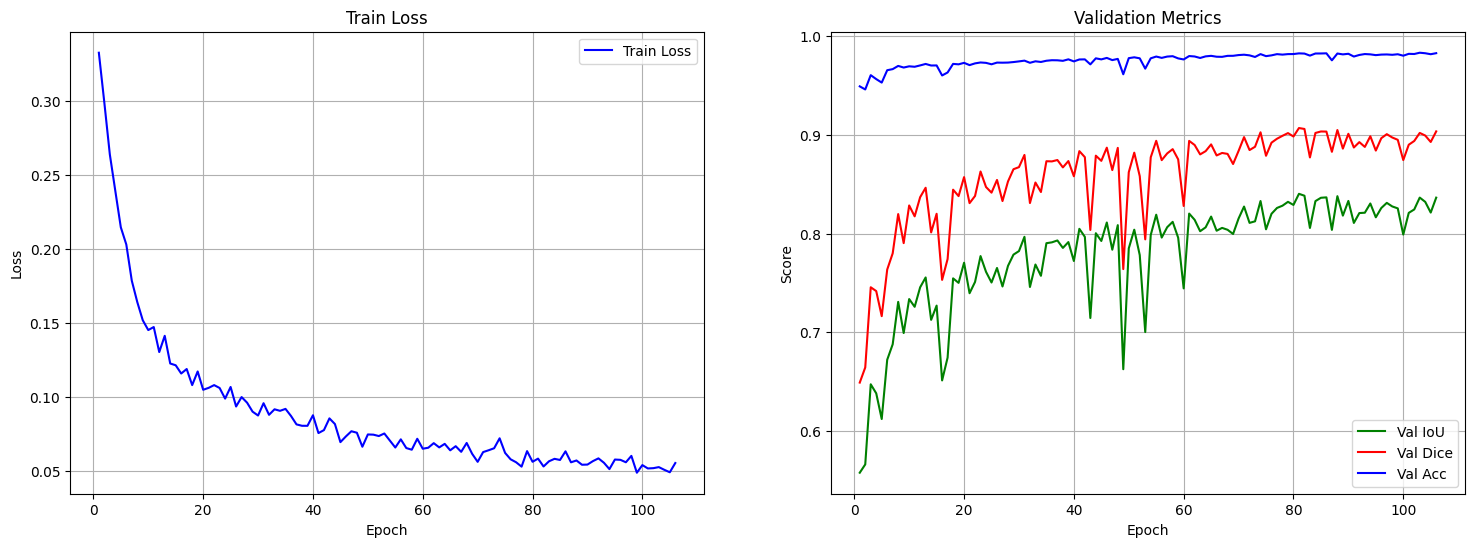

In [54]:
# Panggil setelah training loop selesai
plot_student_history(history)


In [57]:
def plot_student_history_with_alpha(history):
    epochs = range(1, len(history['train_loss']) + 1)

    plt.figure(figsize=(18, 8))

    # Plot Loss
    plt.subplot(2, 1, 1)
    plt.plot(epochs, history['train_loss'], 'b-', label='Train Loss')
    plt.legend()
    plt.grid(True)

    # Plot Metrics + Alpha
    plt.subplot(2, 1, 2)
    plt.plot(epochs, history['val_iou'], 'g-', label='Val IoU')
    plt.plot(epochs, history['val_dice'], 'r-', label='Val Dice')
    plt.legend()
    plt.grid(True)

    plt.show()


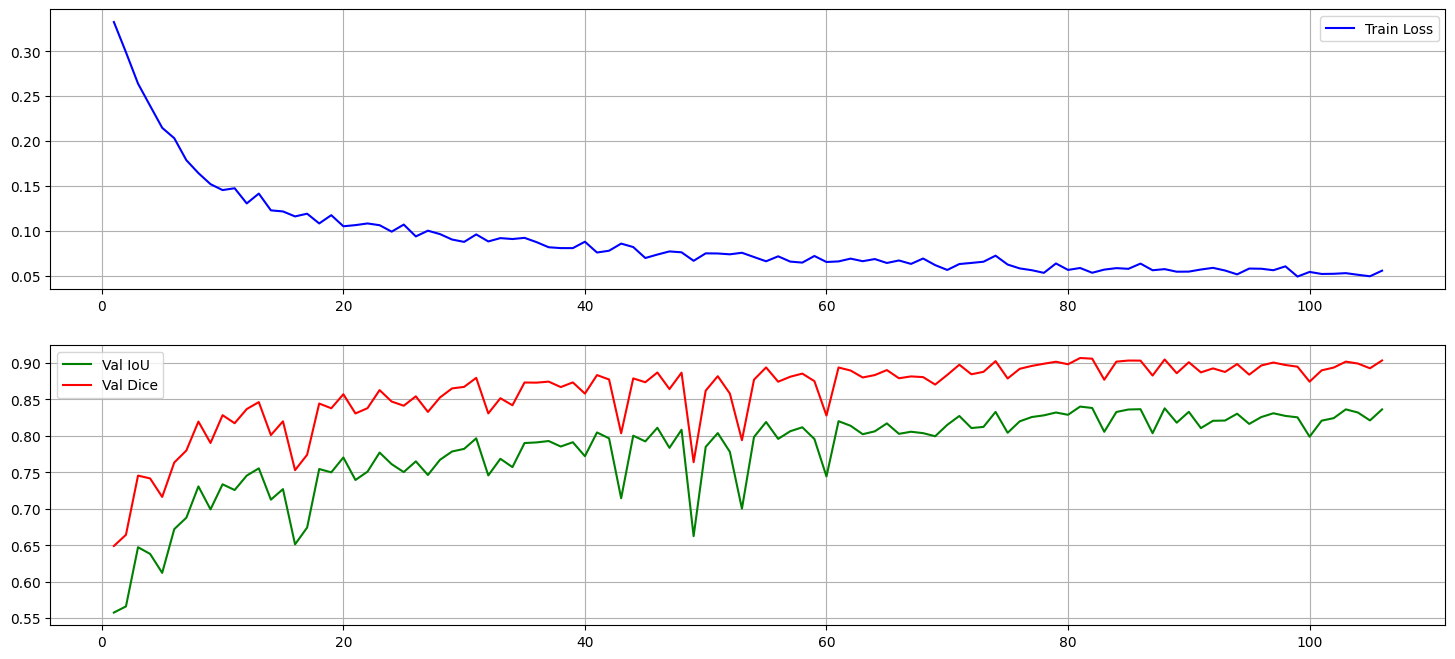

In [58]:
plot_student_history_with_alpha(history)

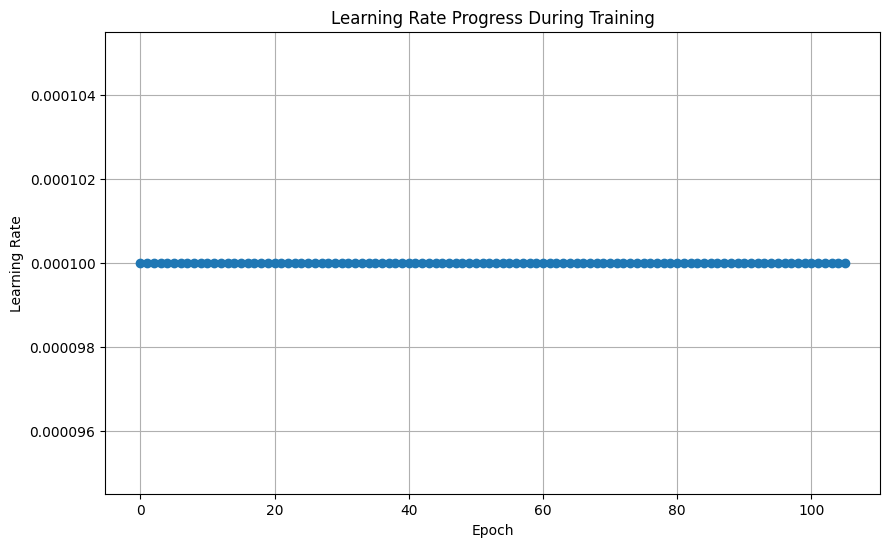

In [59]:
import matplotlib.pyplot as plt

# Plot Learning Rate vs Epoch
plt.figure(figsize=(10, 6))
plt.plot(history["lr"], marker='o')
plt.title("Learning Rate Progress During Training")
plt.xlabel("Epoch")
plt.ylabel("Learning Rate")
plt.grid(True)
plt.show()


In [ ]:
# Plot alpha vs Epoch
plt.figure(figsize=(10, 6))
plt.plot(history["alpha"], marker='o')
plt.title("Alpha Progress During Training")
plt.xlabel("Epoch")
plt.ylabel("Alpha")
plt.grid(True)
plt.show()


## Simpan History

In [60]:
import os
import json
import pandas as pd

# Path penyimpanan di Google Drive
save_path = '/content/drive/MyDrive/colab_indra/ss/cwfid_new/fast_scnn'

# Pastikan folder ada
os.makedirs(save_path, exist_ok=True)

# Save JSON
history_filename_json = os.path.join(save_path, 'student_training_history.json')
with open(history_filename_json, 'w') as f:
    json.dump(history, f)
print(f"✅ History JSON saved to {history_filename_json}")

# Save CSV
df_history = pd.DataFrame(history)
history_filename_csv = os.path.join(save_path, 'student_history.csv')
df_history.to_csv(history_filename_csv, index=False)
print(f"✅ History CSV saved to {history_filename_csv}")



✅ History JSON saved to /content/drive/MyDrive/colab_indra/ss/cwfid_new/fast_scnn/student_training_history.json
✅ History CSV saved to /content/drive/MyDrive/colab_indra/ss/cwfid_new/fast_scnn/student_history.csv


In [61]:
import os
save_path = '/content/drive/MyDrive/colab_indra/ss/cwfid_new/fast_scnn'


os.makedirs(save_path, exist_ok=True)
# Path file
best_model_path = os.path.join(save_path, 'best_fast_scnn_student_model.pth')

# Save best model guru
torch.save(student_model.state_dict(), best_model_path)
print(f"✅ Model Guru Terbaik Disimpan di: {best_model_path}")


✅ Model Guru Terbaik Disimpan di: /content/drive/MyDrive/colab_indra/ss/cwfid_new/fast_scnn/best_fast_scnn_student_model.pth


# Fungsi Evaluasi Klasik

📊 Training Metrics:
Precision (macro): 0.9349
Recall (macro):    0.9498
F1-Score (macro):  0.9422
Confusion Matrix:
[[79731124   179047   480737]
 [   97824  1684852    67616]
 [  300506     8395  5530283]]


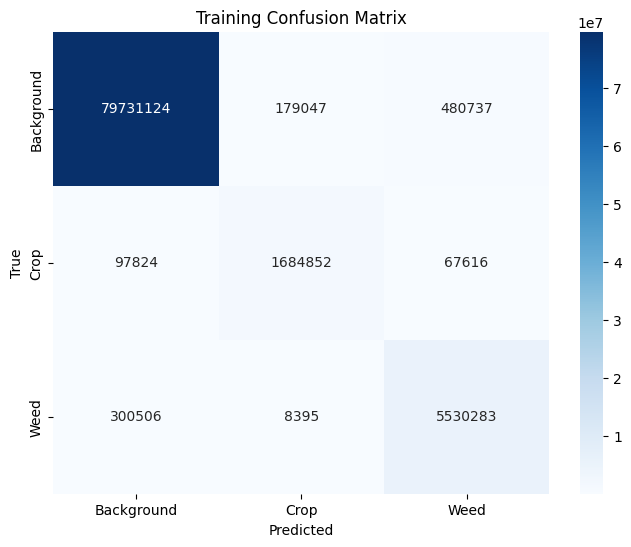

📊 Validation Metrics:
Precision (macro): 0.9330
Recall (macro):    0.9440
F1-Score (macro):  0.9384
Confusion Matrix:
[[79724384   174894   491630]
 [  107914  1654496    87882]
 [  304175    10652  5524357]]


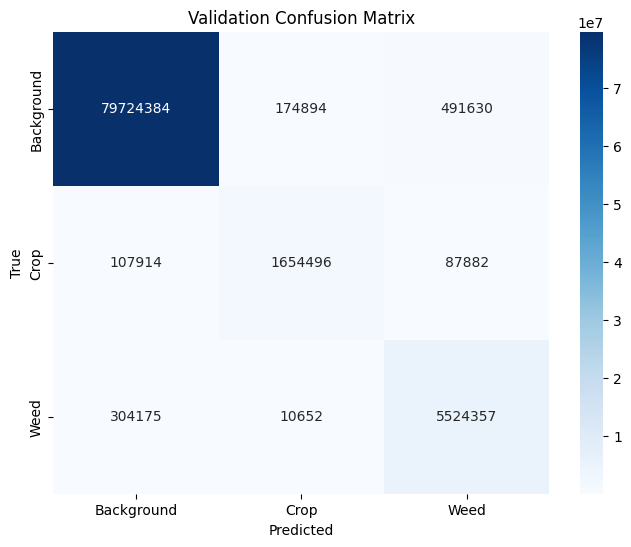

📊 Test Metrics:
Precision (macro): 0.9344
Recall (macro):    0.9463
F1-Score (macro):  0.9402
Confusion Matrix:
[[79742085   176553   472270]
 [  108164  1664688    77440]
 [  296940    10881  5531363]]


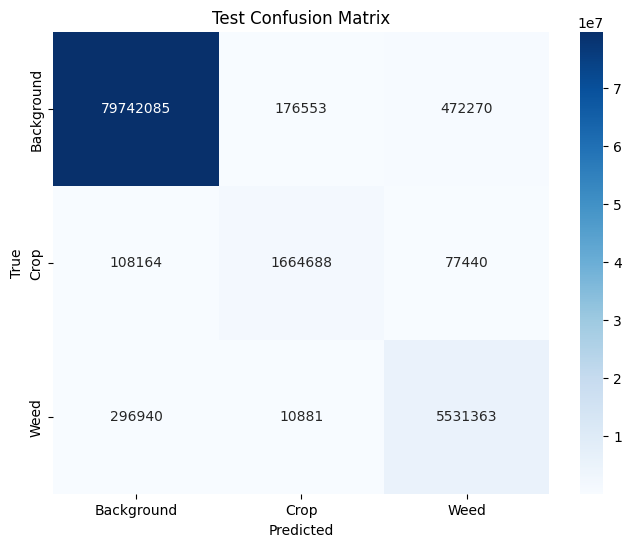

In [62]:
# Load model guru terbaik
#model.load_state_dict(torch.load('best_guru_model.pth'))
student_model.cuda()

# Nama kelas (optional buat plot)
class_names = ['Background', 'Crop', 'Weed']

# Evaluasi di training data
train_precision, train_recall, train_f1, train_cm = evaluate_metrics(
    student_model, train_loader, dataset_name='Training', class_names=class_names
)

# Evaluasi di validation data
val_precision, val_recall, val_f1, val_cm = evaluate_metrics(
    student_model, val_loader, dataset_name='Validation', class_names=class_names
)

# Evaluasi di test data
test_precision, test_recall, test_f1, test_cm = evaluate_metrics(
    student_model, test_loader,
    dataset_name='Test',
    class_names=class_names
)


#Evaluasi Per Class

In [82]:
from sklearn.metrics import precision_score, recall_score, f1_score, confusion_matrix
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

def evaluate_per_class_metrics(model, loader, class_names=None, num_classes=3):
    model.eval()

    all_preds = []
    all_masks = []

    with torch.no_grad():
        for imgs, masks in loop:
            imgs = imgs.to(device)
            masks = masks.to(device)

            outputs_raw = model(imgs)

            # Cek output
            outputs = outputs_raw[0] if isinstance(outputs_raw, (tuple, list)) else outputs_raw

            preds = torch.argmax(outputs, dim=1)

            all_preds.append(preds.cpu().numpy().flatten())
            all_masks.append(masks.cpu().numpy().flatten())

    # Gabungkan semua batch
    all_preds = np.concatenate(all_preds)
    all_masks = np.concatenate(all_masks)

    # Confusion Matrix (raw count)
    cm = confusion_matrix(all_masks, all_preds, labels=list(range(num_classes)))

    # Confusion Matrix (percent per row/class)
    cm_percent = cm.astype(np.float64)
    cm_percent = cm_percent / cm_percent.sum(axis=1, keepdims=True) * 100
    cm_percent = np.round(cm_percent, 2)

    # Precision, Recall, F1-score per kelas
    precision = precision_score(all_masks, all_preds, labels=list(range(num_classes)), average=None, zero_division=0)
    recall = recall_score(all_masks, all_preds, labels=list(range(num_classes)), average=None, zero_division=0)
    f1 = f1_score(all_masks, all_preds, labels=list(range(num_classes)), average=None, zero_division=0)

    # IoU per kelas
    iou_per_class = []
    for cls in range(num_classes):
        tp = cm[cls, cls]
        fp = cm[:, cls].sum() - tp
        fn = cm[cls, :].sum() - tp
        iou = tp / (tp + fp + fn + 1e-7)
        iou_per_class.append(iou)

    # Print Metrics Per Class
    print("Class-wise Metrics:\n")
    for cls in range(num_classes):
        class_name = class_names[cls] if class_names else f"Class {cls}"
        print(f"📌 {class_name}")
        print(f"Precision: {precision[cls]:.4f}")
        print(f"Recall   : {recall[cls]:.4f}")
        print(f"F1-Score : {f1[cls]:.4f}")
        print(f"IoU      : {iou_per_class[cls]:.4f}\n")

    # Plot Confusion Matrix (Percent)
    plt.figure(figsize=(8, 6))
    sns.heatmap(cm_percent, annot=True, fmt='.2f', cmap='Blues',
                xticklabels=class_names if class_names else range(num_classes),
                yticklabels=class_names if class_names else range(num_classes))
    plt.xlabel('Predicted Label')
    plt.ylabel('True Label')
    plt.title('Confusion Matrix (%) per Class')
    plt.show()

    return precision, recall, f1, iou_per_class, cm_percent


Class-wise Metrics:

📌 Background
Precision: 0.9949
Recall   : 0.9919
F1-Score : 0.9934
IoU      : 0.9869

📌 Crop
Precision: 0.8996
Recall   : 0.9140
F1-Score : 0.9067
IoU      : 0.8294

📌 Weed
Precision: 0.9120
Recall   : 0.9462
F1-Score : 0.9288
IoU      : 0.8670



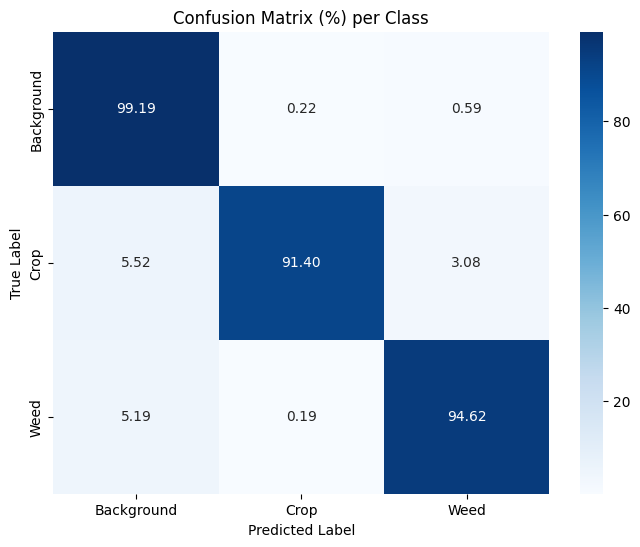

Class-wise Metrics:

📌 Background
Precision: 0.9948
Recall   : 0.9919
F1-Score : 0.9934
IoU      : 0.9868

📌 Crop
Precision: 0.8996
Recall   : 0.9148
F1-Score : 0.9071
IoU      : 0.8300

📌 Weed
Precision: 0.9127
Recall   : 0.9447
F1-Score : 0.9284
IoU      : 0.8663



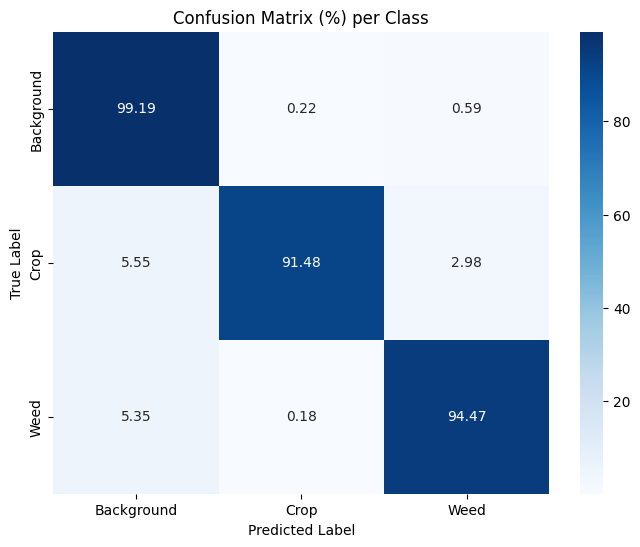

Class-wise Metrics:

📌 Background
Precision: 0.9950
Recall   : 0.9917
F1-Score : 0.9933
IoU      : 0.9867

📌 Crop
Precision: 0.8991
Recall   : 0.8870
F1-Score : 0.8930
IoU      : 0.8067

📌 Weed
Precision: 0.9026
Recall   : 0.9473
F1-Score : 0.9244
IoU      : 0.8594



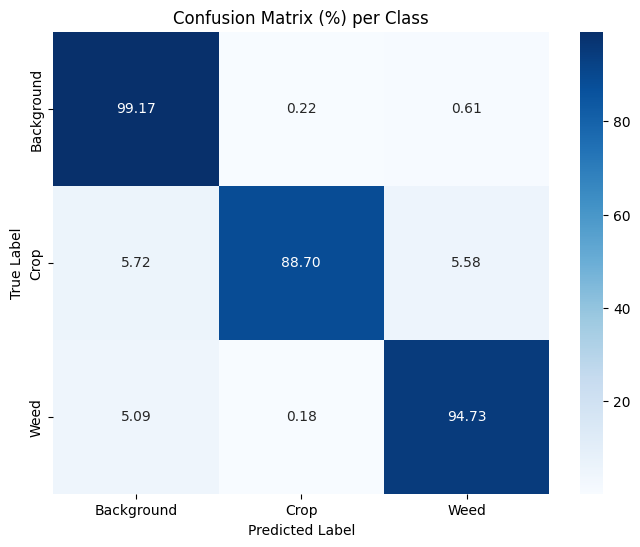

(array([0.99496706, 0.89905962, 0.90257663]),
 array([0.99169767, 0.88698108, 0.94725068]),
 array([0.99332967, 0.89297951, 0.92437421]),
 [np.float64(0.9867477461031494),
  np.float64(0.8066512922746233),
  np.float64(0.859382705422771)],
 array([[99.17,  0.22,  0.61],
        [ 5.72, 88.7 ,  5.58],
        [ 5.09,  0.18, 94.73]]))

In [83]:
class_names = ['Background', 'Crop', 'Weed']
evaluate_per_class_metrics(student_model, train_loader, class_names=class_names)
evaluate_per_class_metrics(student_model, val_loader, class_names=class_names)
evaluate_per_class_metrics(student_model, test_loader, class_names=class_names)


#Inferensi Full Image Dataset Asli

In [ ]:
'''
# Load best guru model
model.load_state_dict(torch.load('/content/drive/MyDrive/colab_indra/ss/cwfid_new/02/best_guru_model.pth'))
model.cuda()
model.eval()
'''


In [65]:
from PIL import Image
import torch
import numpy as np
import matplotlib.pyplot as plt
from sklearn.metrics import precision_score, recall_score, f1_score, confusion_matrix


In [66]:
def infer_full_image(image_path, model, patch_size=512, stride=256, num_classes=3):
    # Load image asli
    img = Image.open(image_path).convert("RGB")
    img_np = np.array(img)

    # Preprocessing sesuai train_transform Normalize (tanpa augmentasi)
    img_norm = (img_np / 255.0 - 0.5) / 0.5
    img_norm = torch.from_numpy(img_norm).permute(2, 0, 1).unsqueeze(0).float().cuda()  # B, C, H, W

    _, _, H, W = img_norm.shape

    # Prepare empty prediction mask
    pred_mask = torch.zeros((num_classes, H, W)).cuda()
    count_mask = torch.zeros((1, H, W)).cuda()

    # Hitung step posisi y dan x termasuk bagian border
    y_steps = list(range(0, H - patch_size + 1, stride))
    x_steps = list(range(0, W - patch_size + 1, stride))

    # Tambahin patch terakhir buat cover pinggir, kalau belum ke-cover
    if y_steps[-1] + patch_size < H:
        y_steps.append(H - patch_size)
    if x_steps[-1] + patch_size < W:
        x_steps.append(W - patch_size)

    # Sliding window inference (patching)
    for y in y_steps:
        for x in x_steps:
            patch = img_norm[:, :, y:y+patch_size, x:x+patch_size]

            with torch.amp.autocast('cuda'):
                output_raw = model(patch)

                # Unpack output utama kalo return tuple/list
                output = output_raw[0] if isinstance(output_raw, (tuple, list)) else output_raw

            pred_mask[:, y:y+patch_size, x:x+patch_size] += output.squeeze(0)
            count_mask[:, y:y+patch_size, x:x+patch_size] += 1

    # Normalisasi hasil prediksi
    pred_mask /= count_mask
    final_pred = torch.argmax(pred_mask, dim=0).cpu().numpy()

    return img_np, final_pred


In [67]:
def evaluate_single_image(pred_mask, gt_mask, num_classes=3, class_names=None):
    # Flatten mask untuk perhitungan metric
    pred_flat = pred_mask.flatten()
    gt_flat = gt_mask.flatten()

    # Confusion Matrix
    cm = confusion_matrix(gt_flat, pred_flat, labels=list(range(num_classes)))

    # Precision, Recall, F1-score per kelas
    precision = precision_score(gt_flat, pred_flat, labels=list(range(num_classes)), average=None, zero_division=0)
    recall = recall_score(gt_flat, pred_flat, labels=list(range(num_classes)), average=None, zero_division=0)
    f1 = f1_score(gt_flat, pred_flat, labels=list(range(num_classes)), average=None, zero_division=0)

    # IoU per kelas
    iou_per_class = []
    for cls in range(num_classes):
        tp = cm[cls, cls]
        fp = cm[:, cls].sum() - tp
        fn = cm[cls, :].sum() - tp
        iou = tp / (tp + fp + fn + 1e-7)
        iou_per_class.append(iou)

    # Tampilkan metrik
    print("📊 Per-Class Evaluation Metrics:")
    for cls in range(num_classes):
        name = class_names[cls] if class_names else f"Class {cls}"
        print(f"{name} | Precision: {precision[cls]:.4f}, Recall: {recall[cls]:.4f}, F1: {f1[cls]:.4f}, IoU: {iou_per_class[cls]:.4f}")

    return precision, recall, f1, iou_per_class, cm


In [68]:
def visualize_full_prediction(img_np, pred_mask, gt_mask=None, class_colors=None, alpha=0.4, class_names=None):
    H, W, _ = img_np.shape

    if class_colors is None:
        class_colors = {
            0: [0, 0, 0],        # Background → Black
            1: [0, 255, 0],      # Crop → Green
            2: [255, 0, 0]       # Weed → Red
        }

    # Buat color mask dari prediksi
    color_pred_mask = np.zeros((H, W, 3), dtype=np.uint8)
    for cls, color in class_colors.items():
        color_pred_mask[pred_mask == cls] = color

    # Overlay prediksi di gambar asli
    overlay_pred = (1 - alpha) * img_np / 255.0 + alpha * color_pred_mask / 255.0
    overlay_pred = np.clip(overlay_pred, 0, 1)

    # Buat color mask dari ground truth (jika ada)
    if gt_mask is not None:
        color_gt_mask = np.zeros((H, W, 3), dtype=np.uint8)
        for cls, color in class_colors.items():
            color_gt_mask[gt_mask == cls] = color
    else:
        color_gt_mask = np.zeros((H, W, 3), dtype=np.uint8)

    # Plot visualisasi
    plt.figure(figsize=(24, 6))

    plt.subplot(1, 4, 1)
    plt.imshow(img_np)
    plt.title("Original Image")
    plt.axis('off')

    plt.subplot(1, 4, 2)
    plt.imshow(color_gt_mask)
    plt.title("Ground Truth Mask")
    plt.axis('off')

    plt.subplot(1, 4, 3)
    plt.imshow(color_pred_mask)
    plt.title("Predicted Mask")
    plt.axis('off')

    plt.subplot(1, 4, 4)
    plt.imshow(overlay_pred)
    plt.title("Overlay Prediction")
    plt.axis('off')

    plt.show()

    # ✅ Evaluasi metrik setelah visualisasi
    if gt_mask is not None:
        precision, recall, f1, iou_per_class, cm = evaluate_single_image(pred_mask, gt_mask, num_classes=len(class_colors), class_names=class_names)
        return precision, recall, f1, iou_per_class, cm
    else:
        print("⚠️ Ground truth mask not provided, skipping metrics evaluation.")
        return None


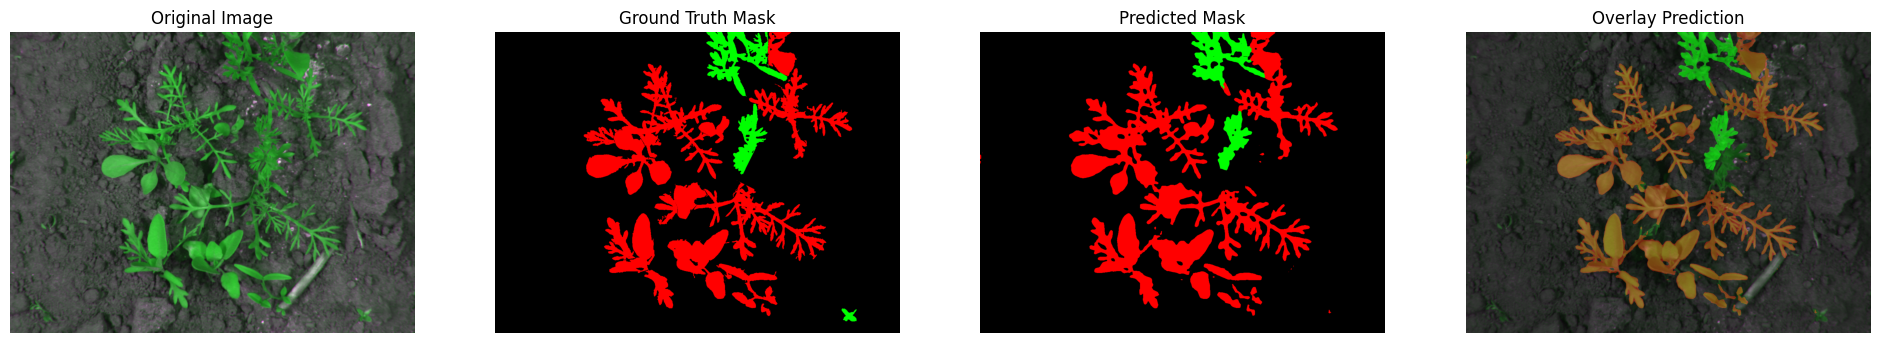

📊 Per-Class Evaluation Metrics:
Background | Precision: 0.9874, Recall: 0.9831, F1: 0.9853, IoU: 0.9710
Crop | Precision: 0.9202, Recall: 0.8129, F1: 0.8633, IoU: 0.7594
Weed | Precision: 0.9052, Recall: 0.9478, F1: 0.9260, IoU: 0.8622


In [69]:
image_path = '/content/dataset-1.0/images/001_image.png'
gt_mask_path = '/content/dataset-1.0/annotations/001_annotation.png'

# Load ground truth mask
gt_mask_rgb = Image.open(gt_mask_path).convert("RGB")
gt_mask_np = np.array(gt_mask_rgb)

# Convert RGB mask ke label mask
gt_label_mask = convert_rgb_mask_to_label(gt_mask_np)

# Inference gambar
img_np, pred_mask = infer_full_image(
    image_path=image_path,
    model=student_model,
    patch_size=512,
    stride=256,
    num_classes=3
)

# Visualisasi + evaluasi
class_names = ['Background', 'Crop', 'Weed']

precision, recall, f1, iou, cm = visualize_full_prediction(
    img_np, pred_mask, gt_mask=gt_label_mask, class_names=class_names
)


In [70]:
import random
import os
from PIL import Image
import numpy as np

# Path dataset
image_dir = '/content/dataset-1.0/images/'
gt_mask_dir = '/content/dataset-1.0/annotations/'

# Ambil semua file di folder gambar (filter png)
image_files = sorted([f for f in os.listdir(image_dir) if f.endswith('.png')])

# Random sampling 5 file
random_images = random.sample(image_files, 5)

# Class names buat evaluasi
class_names = ['Background', 'Crop', 'Weed']

# Loop 5 sample
for idx, img_file in enumerate(random_images):
    print(f"\n🔎 Sample {idx+1}: {img_file}")

    # Path image dan ground truth mask
    image_path = os.path.join(image_dir, img_file)

    # Sesuaikan nama mask (replace image jadi annotation kalau beda)
    gt_mask_file = img_file.replace('image', 'annotation')  # <== Penyesuaian!
    gt_mask_path = os.path.join(gt_mask_dir, gt_mask_file)

    # Load ground truth mask
    gt_mask_rgb = Image.open(gt_mask_path).convert("RGB")
    gt_mask_np = np.array(gt_mask_rgb)

    # Convert RGB mask ke label mask
    gt_label_mask = convert_rgb_mask_to_label(gt_mask_np)

    # Inference gambar
    img_np, pred_mask = infer_full_image(
        image_path=image_path,
        model=student_model,
        patch_size=512,
        stride=256,
        num_classes=3
    )

    # Visualisasi + evaluasi
    precision, recall, f1, iou, cm = visualize_full_prediction(
        img_np, pred_mask, gt_mask=gt_label_mask, class_names=class_names
    )

    # Optional: print metrics simple
    print(f"✅ Finished sample {idx+1}")


Output hidden; open in https://colab.research.google.com to view.

#test pada test dataset

In [71]:
def infer_from_array(image_array, model, patch_size=512, stride=256, num_classes=3):
    # Convert array (H, W, C) ➡️ Tensor dan normalisasi (sama kayak training!)
    img_norm = (image_array / 255.0 - 0.5) / 0.5
    img_norm = torch.from_numpy(img_norm).permute(2, 0, 1).unsqueeze(0).float().cuda()  # B, C, H, W

    _, _, H, W = img_norm.shape

    # Prepare empty prediction mask
    pred_mask = torch.zeros((num_classes, H, W)).cuda()
    count_mask = torch.zeros((1, H, W)).cuda()

    # Hitung langkah patch
    y_steps = list(range(0, H - patch_size + 1, stride))
    x_steps = list(range(0, W - patch_size + 1, stride))

    if y_steps[-1] + patch_size < H:
        y_steps.append(H - patch_size)
    if x_steps[-1] + patch_size < W:
        x_steps.append(W - patch_size)

    # Sliding window inference
    for y in y_steps:
        for x in x_steps:
            patch = img_norm[:, :, y:y+patch_size, x:x+patch_size]

            with torch.amp.autocast('cuda'):
                output_raw = model(patch)
                # Unpack output utama kalo return tuple/list
                output = output_raw[0] if isinstance(output_raw, (tuple, list)) else output_raw

            pred_mask[:, y:y+patch_size, x:x+patch_size] += output.squeeze(0)
            count_mask[:, y:y+patch_size, x:x+patch_size] += 1

    # Normalisasi hasil prediksi
    pred_mask /= count_mask
    final_pred = torch.argmax(pred_mask, dim=0).cpu().numpy()

    return final_pred


In [72]:
import random
import matplotlib.pyplot as plt
import numpy as np

# Asumsi test_dataset return: image, label_mask
# Kalau custom dataset lo return tuple lain ➡️ sesuaikan ya bro!

# Class names buat evaluasi
class_names = ['Background', 'Crop', 'Weed']

# Ambil 5 index random dari test_dataset
random_indices = random.sample(range(len(test_dataset)), 5)

for idx, sample_idx in enumerate(random_indices):
    print(f"\n🔎 Test Sample {idx+1} | Dataset index: {sample_idx}")

    # Ambil data sample dari test_dataset
    image_tensor, gt_label_mask = test_dataset[sample_idx]

    # Convert image_tensor (C, H, W) ➡️ numpy (H, W, C)
    img_np = image_tensor.permute(1, 2, 0).cpu().numpy()

    # Denormalisasi image kalau sebelumnya dinormalisasi
    img_np = (img_np * 0.5 + 0.5) * 255  # Sesuai normalisasi training lo!
    img_np = img_np.astype(np.uint8)

    # Inference ➡️ langsung dari image_tensor atau dari img_np
    # Kalau infer_full_image butuh path ➡️ kita bikin versi infer_from_array!
    pred_mask = infer_from_array(
        image_array=img_np,
        model=student_model,
        patch_size=512,
        stride=256,
        num_classes=3
    )

    # Visualisasi + evaluasi
    precision, recall, f1, iou, cm = visualize_full_prediction(
        img_np, pred_mask, gt_mask=gt_label_mask.cpu().numpy(), class_names=class_names
    )

    print(f"✅ Finished test sample {idx+1}")


Output hidden; open in https://colab.research.google.com to view.

In [73]:
import time
import torch

def measure_inference_time(model, input_size=(1, 3, 512, 512), num_runs=100, device='cuda'):
    model.eval()
    dummy_input = torch.randn(input_size).to(device)

    # Warm-up GPU (biar gak kena cold start)
    with torch.no_grad():
        for _ in range(10):
            _ = model(dummy_input)

    # Start timing
    torch.cuda.synchronize()  # pastikan semua proses selesai (untuk GPU)
    start_time = time.time()

    with torch.no_grad():
        for _ in range(num_runs):
            _ = model(dummy_input)

    torch.cuda.synchronize()
    end_time = time.time()

    total_time = end_time - start_time
    avg_time_per_run = total_time / num_runs

    print(f"🔥 Inference time per image ({input_size[-2]}x{input_size[-1]}): {avg_time_per_run*1000:.2f} ms")
    print(f"⚡ FPS (Frames Per Second): {1.0 / avg_time_per_run:.2f}")

    return avg_time_per_run


In [74]:
import torch

if torch.cuda.is_available():
    gpu_idx = torch.cuda.current_device()
    gpu_name = torch.cuda.get_device_name(gpu_idx)
    gpu_capability = torch.cuda.get_device_capability(gpu_idx)
    gpu_mem = torch.cuda.get_device_properties(gpu_idx).total_memory / 1024**3

    print(f"🖥️ GPU Name         : {gpu_name}")
    print(f"🛠️ Compute Capability : {gpu_capability}")
    print(f"💾 Total VRAM        : {gpu_mem:.2f} GB")
else:
    print("⚠️ CUDA not available. Using CPU.")


🖥️ GPU Name         : Tesla T4
🛠️ Compute Capability : (7, 5)
💾 Total VRAM        : 14.74 GB


In [75]:
!nvidia-smi


Wed May  7 17:57:00 2025       
+-----------------------------------------------------------------------------------------+
| NVIDIA-SMI 550.54.15              Driver Version: 550.54.15      CUDA Version: 12.4     |
|-----------------------------------------+------------------------+----------------------+
| GPU  Name                 Persistence-M | Bus-Id          Disp.A | Volatile Uncorr. ECC |
| Fan  Temp   Perf          Pwr:Usage/Cap |           Memory-Usage | GPU-Util  Compute M. |
|                                         |                        |               MIG M. |
|=========================================+========================+======================|
|   0  Tesla T4                       Off |   00000000:00:04.0 Off |                    0 |
| N/A   67C    P0             31W /   70W |    1666MiB /  15360MiB |      0%      Default |
|                                         |                        |                  N/A |
+-----------------------------------------+-----

In [76]:
# Pastikan model di GPU/CPU
student_model.cuda()  # atau model.cpu() kalau mau test CPU

# Ukur waktu inferensi, contoh input 512x512, 100 kali loop
measure_inference_time(student_model, input_size=(1, 3, 512, 512), num_runs=100, device='cuda')


🔥 Inference time per image (512x512): 5.43 ms
⚡ FPS (Frames Per Second): 184.27


0.005426928997039795

In [77]:
import time

start_time = time.time()

img_np, pred_mask = infer_full_image(
    image_path=image_path,
    model=student_model,
    patch_size=512,
    stride=256,
    num_classes=3
)

end_time = time.time()
total_time = end_time - start_time

print(f"🔥 Inference time per full image: {total_time:.3f} sec")
print(f"⚡ FPS (full image): {1.0 / total_time:.2f}")


🔥 Inference time per full image: 0.202 sec
⚡ FPS (full image): 4.95


#Evaluasi Head-to-Head Style McCool

In [78]:
import numpy as np
from sklearn.metrics import confusion_matrix, precision_score, recall_score

def evaluate_mccool_metrics(pred_mask, gt_mask, num_classes=3, class_names=None):
    # Flatten buat metric calculation
    pred_flat = pred_mask.flatten()
    gt_flat = gt_mask.flatten()

    # Confusion Matrix
    cm = confusion_matrix(gt_flat, pred_flat, labels=list(range(num_classes)))

    # Overall Pixel-wise Accuracy
    overall_acc = np.sum(np.diag(cm)) / np.sum(cm)

    # Per-class Precision & Recall
    precision = precision_score(gt_flat, pred_flat, labels=list(range(num_classes)), average=None, zero_division=0)
    recall = recall_score(gt_flat, pred_flat, labels=list(range(num_classes)), average=None, zero_division=0)

    # FPR & FNR per class
    fpr = []
    fnr = []
    for cls in range(num_classes):
        tp = cm[cls, cls]
        fn = cm[cls, :].sum() - tp
        fp = cm[:, cls].sum() - tp
        tn = np.sum(cm) - (tp + fp + fn)

        fpr_cls = fp / (fp + tn + 1e-7)
        fnr_cls = fn / (fn + tp + 1e-7)

        fpr.append(fpr_cls)
        fnr.append(fnr_cls)

    # Tampilkan Hasil
    print(f"======================== McCool Style Metrics ========================")
    print(f"Overall Pixel-wise Accuracy (ACC): {overall_acc:.4f}")

    for cls in range(num_classes):
        name = class_names[cls] if class_names else f"Class {cls}"
        print(f"\n📌 {name}")
        print(f"Precision: {precision[cls]:.4f}")
        print(f"Recall   : {recall[cls]:.4f}")
        print(f"FPR      : {fpr[cls]*100:.2f}%")
        print(f"FNR      : {fnr[cls]*100:.2f}%")

    return overall_acc, precision, recall, fpr, fnr


In [79]:
def evaluate_dataset_mccool(model, loader, dataset_name='Dataset', class_names=None, num_classes=3):
    model.eval()

    all_preds = []
    all_masks = []

    with torch.no_grad():
        for imgs, masks in loader:
            imgs = imgs.cuda()
            masks = masks.cuda()

            with torch.amp.autocast('cuda'):
                outputs_raw = model(imgs)

                # Cek output
                outputs = outputs_raw[0] if isinstance(outputs_raw, (tuple, list)) else outputs_raw

            preds = torch.argmax(outputs, dim=1)

            all_preds.append(preds.cpu().numpy().flatten())
            all_masks.append(masks.cpu().numpy().flatten())

    # Gabungkan semua prediksi dan ground truth
    all_preds = np.concatenate(all_preds)
    all_masks = np.concatenate(all_masks)

    print(f"\n====================== {dataset_name} ======================")
    return evaluate_mccool_metrics(all_preds, all_masks, num_classes=num_classes, class_names=class_names)


In [80]:
# Pastikan class_names sesuai dataset
class_names = ['Background', 'Crop', 'Weed']

# Train
evaluate_dataset_mccool(student_model, train_loader, dataset_name='TRAIN', class_names=class_names)

# Validation
evaluate_dataset_mccool(student_model, val_loader, dataset_name='VALIDATION', class_names=class_names)

# Test
evaluate_dataset_mccool(student_model, test_loader, dataset_name='TEST', class_names=class_names)



====================== TRAIN ======================
======================== McCool Style Metrics ========================
Overall Pixel-wise Accuracy (ACC): 0.9870

📌 Background
Precision: 0.9949
Recall   : 0.9917
FPR      : 5.34%
FNR      : 0.83%

📌 Crop
Precision: 0.9001
Recall   : 0.9135
FPR      : 0.22%
FNR      : 8.65%

📌 Weed
Precision: 0.9102
Recall   : 0.9460
FPR      : 0.66%
FNR      : 5.40%

====================== VALIDATION ======================
======================== McCool Style Metrics ========================
Overall Pixel-wise Accuracy (ACC): 0.9824

📌 Background
Precision: 0.9944
Recall   : 0.9892
FPR      : 6.03%
FNR      : 1.08%

📌 Crop
Precision: 0.8536
Recall   : 0.8194
FPR      : 0.26%
FNR      : 18.06%

📌 Weed
Precision: 0.8614
Recall   : 0.9333
FPR      : 1.07%
FNR      : 6.67%

====================== TEST ======================
======================== McCool Style Metrics ========================
Overall Pixel-wise Accuracy (ACC): 0.9800

📌 Background
Pre

(np.float64(0.9799657662709554),
 array([0.99392952, 0.8651923 , 0.84728785]),
 array([0.9878144 , 0.79136361, 0.94062232]),
 [np.float64(0.05936401908648627),
  np.float64(0.002956476804107957),
  np.float64(0.012533191860389585)],
 [np.float64(0.01218559719056684),
  np.float64(0.2086363898627095),
  np.float64(0.05937768418718663)])

#tes langsung 512x512 tanpa patch

 Random ➡️ Resize ➡️ Inference ➡️ Visualisasi

In [81]:
import random
import os
from PIL import Image
import numpy as np
import torch
import matplotlib.pyplot as plt

# Path dataset asli
image_dir = '/content/dataset-1.0/images/'
gt_mask_dir = '/content/dataset-1.0/annotations/'

# Ambil semua file gambar
image_files = sorted([f for f in os.listdir(image_dir) if f.endswith('.png')])

# Ambil 5 gambar random
random_images = random.sample(image_files, 5)

# Class names buat evaluasi
class_names = ['Background', 'Crop', 'Weed']

# Model ke eval mode
student_model.eval()

for idx, img_file in enumerate(random_images):
    print(f"\n🔎 Sample {idx+1}: {img_file}")

    # Load image
    image_path = os.path.join(image_dir, img_file)
    img = Image.open(image_path).convert("RGB")

    # Resize ke 512x512
    img_resized = img.resize((512, 512))
    img_np = np.array(img_resized)

    # Normalisasi (sesuai training transform lo)
    img_norm = (img_np / 255.0 - 0.5) / 0.5
    img_tensor = torch.from_numpy(img_norm).permute(2, 0, 1).unsqueeze(0).float().cuda()  # [1, C, 512, 512]

    # Ground truth mask
    gt_mask_file = img_file.replace('image', 'annotation')  # Pastikan sesuai nama mask lo!
    gt_mask_path = os.path.join(gt_mask_dir, gt_mask_file)
    gt_mask = Image.open(gt_mask_path).convert("RGB")
    gt_mask_resized = gt_mask.resize((512, 512))  # Resize mask juga!
    gt_mask_np = np.array(gt_mask_resized)

    # Convert RGB mask ke label mask
    gt_label_mask = convert_rgb_mask_to_label(gt_mask_np)

    # Inference
    with torch.no_grad():
        with torch.amp.autocast('cuda'):
            outputs_raw = student_model(img_tensor)
            outputs = outputs_raw[0] if isinstance(outputs_raw, (tuple, list)) else outputs_raw

    # Ambil prediksi mask
    pred_mask = torch.argmax(outputs.squeeze(0), dim=0).cpu().numpy()

    # Convert image_tensor buat visualisasi
    img_vis = (img_tensor.squeeze(0).permute(1, 2, 0).cpu().numpy() * 0.5 + 0.5) * 255
    img_vis = img_vis.astype(np.uint8)

    # Visualisasi + evaluasi
    precision, recall, f1, iou, cm = visualize_full_prediction(
        img_vis, pred_mask, gt_mask=gt_label_mask, class_names=class_names
    )

    print(f"✅ Finished sample {idx+1}")


Output hidden; open in https://colab.research.google.com to view.